In [26]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

## Financial Network Models with Python
  []()

### Miguel Vaz
  []()

#### For Python Quants Conference
NYC, 6$^{th}$ of May 2016

http://fpq.io

https://github.com/mvaz/FPQ2016

# About me

@migueljvaz

- Risk Management (Consulting)
   * focus on Market Risk
   * d-fine GmbH (2012 - )
- Software Developer
   * BI, Java, Python
   * 360 Trading Networks (2010-2012)
- PhD in Robotics at the Honda Research Institute
  - once I saw ASIMO naked (!)

## All views are my own and not necessarily those of my employer or any other organization or individual.

<div class="col-xs-1"><h1>I</h1></div>
<div class="col-xs-2">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Heart_coraz%C3%B3n.svg/75px-Heart_coraz%C3%B3n.svg.png"/>
</div>
<div class="col-xs-6"><h1>networks</h1></div>

# Part I: Why?

### Networks give us a way to quantify and reason about concepts that are already familiar to us.

"New York is a financial **hub**"

"Ebola is a **contagious** disease"

"Lehman was too **central** to be let fail"

### Networks are great for representing structure

... and structure reveals much

![](pics/organisation.png)

http://www.bonkersworld.net/organizational-charts/

# Financial Structure: Central Clearing 

Obligation for certain types of contracts introduced by the "European Market Infrastructure Regulation (EMIR)", and "Dodd–Frank Wall Street Reform and Consumer Protection Act".

![](pics/clearing.png)

## Changes the network structure of the system

### From
![](pics/counterparties_fully_connected.png)


### To
![](pics/counterparties_clearing.png)

### Engaging visualizations

Usage of spatial representations makes use of our visual capabilities.

# Networks in Python


### NetworkX
    - https://networkx.github.io/
    - based on dictionaries
    - large set of centrality measures and algorithms
    - simple usage, ideal for small and middle-sized graphs

### python-igraph
    - http://igraph.org/python/
    - based on the C library 'igraph'
    - same interface as for e.g. R
    - complements NetworkX for some functionality

### Graph-Tool
    - https://graph-tool.skewed.de/
    - based heavily on the C++ Boost Graph Library
    - large set of features and algorithms
    - ideal for larger graphs (not "big data"-style)
    - in my experience, difficult to install

# Part II: Graphs and networks 

# Definitions


A **graph** is a set of nodes and edges between them

$$G = (V, E)$$

The **adjacency matrix** of $G$ is given by
$$A_{i,j}:=
\begin{cases}
w(i,j) & \mbox{if}\ i \neq j\, \mbox{and}\ v_i \mbox{ is adjacent to } v_j \\
0 & \mbox{otherwise}
\end{cases}
$$

A **network** is a model of some connected process with a structure that can be represented by a graph.

## Undirected, unweighted graph
![](pics/undirected.png)

In [27]:
import networkx as nx
guu = nx.Graph()
guu.add_path((1,2,3,4,5,3))
guu.add_path((8,7,5,6,7))

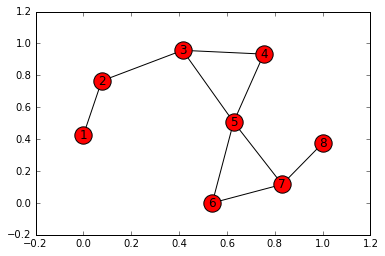

In [28]:
%matplotlib inline

nx.draw_networkx(guu)

## Directed, unweighted graph
![](pics/directed.png)

In [29]:
gdu = nx.DiGraph()
gdu.add_path((8,7,6,5,3,2))
gdu.add_edges_from(((1,2), (4,3),(4,5),(7,5)))

<IPython.core.display.Javascript object>


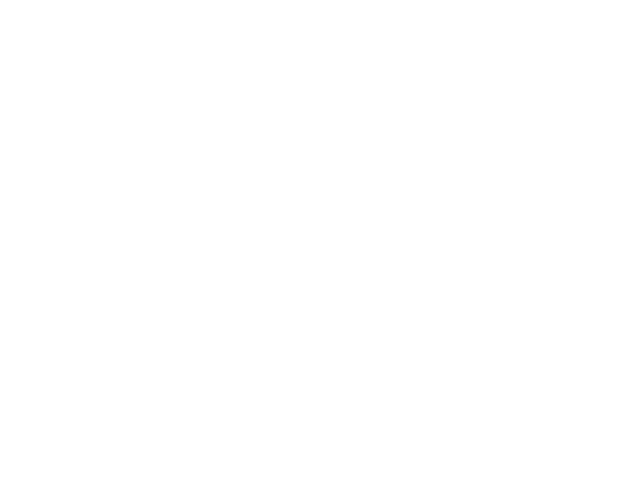

In [30]:
%matplotlib notebook
nx.draw_networkx(gdu, iterations=100)

## Weighted, directed graph
![](pics/weighted.png)

In [31]:
import numpy as np, six

adj = np.zeros((8,8))
adj[0,1] = .8; adj[2,1] = .7; adj[3,2] = .2; adj[3,4] = .6
adj[4,2] = .5; adj[5,4] = .7; adj[6,4] = .3; adj[6,5] = .9; adj[7,6] = 1.
gwd = nx.from_numpy_matrix(adj, create_using=nx.DiGraph()) 

In [32]:
[gwd[u][v]['weight'] for u,v in gwd.edges()]

[0.8, 0.7, 0.2, 0.6, 0.5, 0.7, 0.3, 0.9, 1.0]

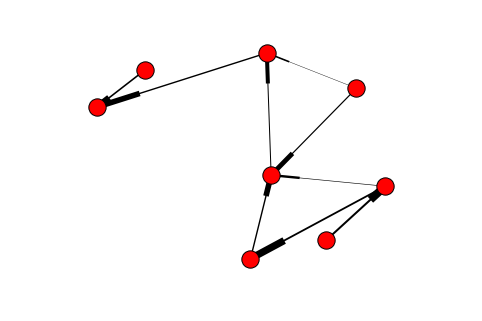

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(gwd, iterations=100)
width = [2 *gwd[u][v]['weight'] for u,v in gwd.edges()]
nx.draw(gwd, pos, edges=gwd.edges(), width=width)

## Bipartite network

Bipartite graphs $B = (U, V, E)$ have two node sets $U,V$ and edges in $E$ that only connect nodes from opposite sets

# Centrality: identifying important nodes

### Degree centrality

The number of connections / neighbours a node has.

In directed networks, in- and out- connections can be distinguished.


In [34]:
nx.degree_centrality(guu)

{1: 0.14285714285714285,
 2: 0.2857142857142857,
 3: 0.42857142857142855,
 4: 0.2857142857142857,
 5: 0.5714285714285714,
 6: 0.2857142857142857,
 7: 0.42857142857142855,
 8: 0.14285714285714285}

<IPython.core.display.Javascript object>


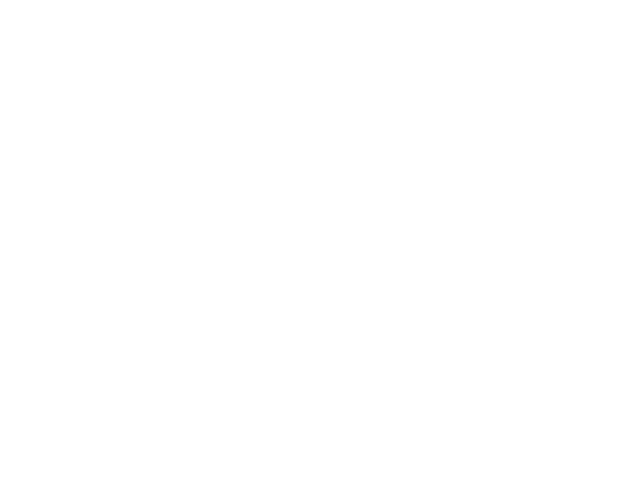

In [35]:
%matplotlib notebook

nx.draw_networkx(guu,
                 cmap=plt.get_cmap('Reds'),
                 node_color=list(nx.degree_centrality(guu).values()))

### Betweenness centrality



In [36]:
nx.betweenness_centrality(guu)

{1: 0.0,
 2: 0.2857142857142857,
 3: 0.47619047619047616,
 4: 0.0,
 5: 0.5714285714285714,
 6: 0.0,
 7: 0.2857142857142857,
 8: 0.0}

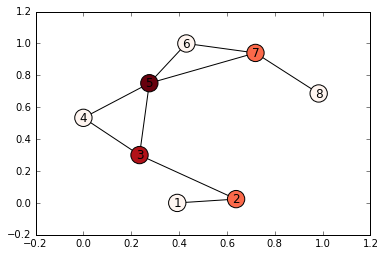

In [37]:
%matplotlib inline

nx.draw_networkx(guu,
                 cmap=plt.get_cmap('Reds'),
                 node_color=list(nx.betweenness_centrality(guu).values()))

### Eigenvector centrality


    A node is important if it is linked to by other important nodes. 


Let $A = (a_i, j)$ be the adjacency matrix of a graph.

The eigenvector centrality $x_i$ of node $i$ is given by:
$$x_i = \frac{1}{\lambda} \sum_k a_{k,i} x_k$$
where $ \lambda \neq 0$ is a constant.

In [38]:
nx.eigenvector_centrality(guu)

{1: 0.06664470539169788,
 2: 0.17965932871754856,
 3: 0.4176814389812938,
 4: 0.36906899172344154,
 5: 0.5772521584580176,
 6: 0.36437563126403233,
 7: 0.40502871786094985,
 8: 0.15024442196362717}

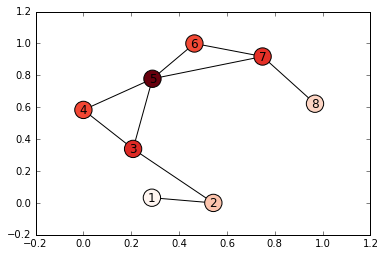

In [47]:
%matplotlib inline

nx.draw_networkx(guu,
                 cmap=plt.get_cmap('Reds'),
                 node_color=list(nx.eigenvector_centrality(guu).values()))

# Community structure

Finding sets of nodes connected with each other:

* Hierarchical methods
* Spectral methods
* Modularity methods

### Hierarchical methods


Linkages
Spanning Trees

TODO add picture of measured correlation matrix

### Spectral methods



Make use of the eigenvectors of the graph laplacian.

The laplacian of the graph is given by 
$$ L = D - A $$
where $D$ is the degree matrix
$$D_{i,j}:=
\begin{cases}
\deg(v_i) & \mbox{if}\ i = j \\
0 & \mbox{otherwise}
\end{cases}
$$
where $\deg(v_i)$ is degree of the vertex i.



### Spectral clustering

#### Input:
- Dissimilarity matrix $S \in R^{n \times n}$
- number $k$ of clusters to construct


#### Algorithm:
- Construct a similarity graph
$A$

- Let $W$ be its weighted adjacency matrix.

- Compute the unnormalized Laplacian
$L = D - A$

- Compute the first $k$ eigenvectors $u_1, \ldots, u_k$ of $L$

- Let $U \in R^{n \times k}$ be the matrix containing the vectors $u_1, \ldots, u_k$ as columns

- For $i = 1,\ldots, n$, let $y_i \in R^k$ be the vector corresponding to the i-th row of U
- Cluster the points $(y_i)_{i=1,\ldots,n}$ in $R^k$ with the k-means algorithm into clusters $C_1,\ldots,C_k$

#### Output:
Clusters $A_1,\ldots,A_k$ with $A_i = \{ j\, |\, y_j \in C_i\}$

### Modularity Maximization


The modularity compares the proportion of links within communities to the expected number of links in a so-called *null*-model.

$$Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i,c_j)$$

where
* $A$  the adjacency matrix,
* $k_i$ the degree of node $i$
* $m$ the sum of the degrees of all nodes
* $\delta(c_i,c_j) = 
\begin{cases}
1 & \mbox{if}\ c_i = c_j,\, \mbox{i.e.}\, i\, \mbox{and}\, j\, \mbox{are in the same community} \\
0 & \mbox{otherwise}
\end{cases}$


The Louvain method:

Blondel, Vincent D., et al. "Fast unfolding of communities in large networks." Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.
http://perso.crans.org/aynaud/communities/


Modularity and community structure in networks, M. E. J. Newman, 2006

### Example

In [40]:
import community

part = community.best_partition(guu)
part

{1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2}

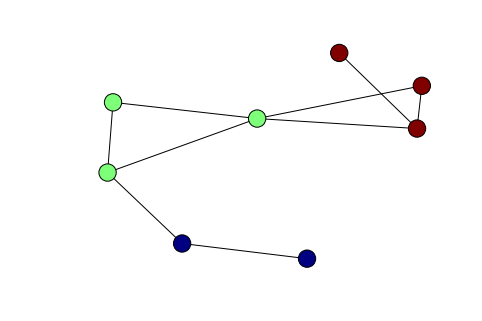

In [46]:
values = [part.get(node) for node in guu.nodes()]

%matplotlib inline
plt.figure('Graph with community structure')
nx.draw_spring(guu,
               cmap=plt.get_cmap('jet'),
               node_color=values)

# Part III: Network models in Finance

Network theory approach is useful for:

- Risk managers: understand how emerging systemic risks can be identified as they cascade through the financial system
- Asset managers: understand the complex time-varying dynamics of interdependencies in financial markets
- Regulators: interedted on the links between financial institutions for macro-prudential supervision

## Counterparty structure: large credit portfolio

Exposure to some obligors may be larger than could be expected, because the equity structure implies a loss to a given obligor if another defaults.

Diagram only considers equity structure.

In [42]:
import pandas as pd
df_anon = pd.read_csv('data/collateral.csv')
credit_net = nx.from_pandas_dataframe(df_anon,
                                      'source', 'target',
                                      edge_attr='weight', create_using=nx.DiGraph())

In [43]:
x0 = [n for n in credit_net.nodes_iter() if credit_net.in_degree(n) == 0]
x1 = [n for n in credit_net.nodes_iter() if credit_net.in_degree(n) > 0 and credit_net.out_degree(n) > 0]
x2 = [n for n in credit_net.nodes_iter() if credit_net.out_degree(n) == 0]

<IPython.core.display.Javascript object>


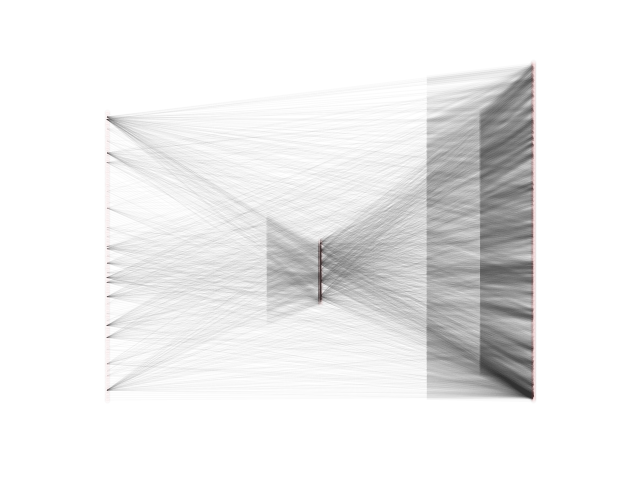

In [44]:
%matplotlib notebook

pos = dict()
# put pure collateral posters on left
pos.update( (n, (1, i*30)) for i, n in enumerate(x0) ) 
# put hybrids in the middle
pos.update( (n, (2, i*20+1200)) for i, n in enumerate(x1) ) 
# put pure issuers on right
pos.update( (n, (3, i*10)) for i, n in enumerate(x2) ) 

plt.figure('Bipartite-like structure')
nx.draw(credit_net, pos=pos, alpha=0.02, node_size=20)

## Degree distribution is far from being uniform

<IPython.core.display.Javascript object>


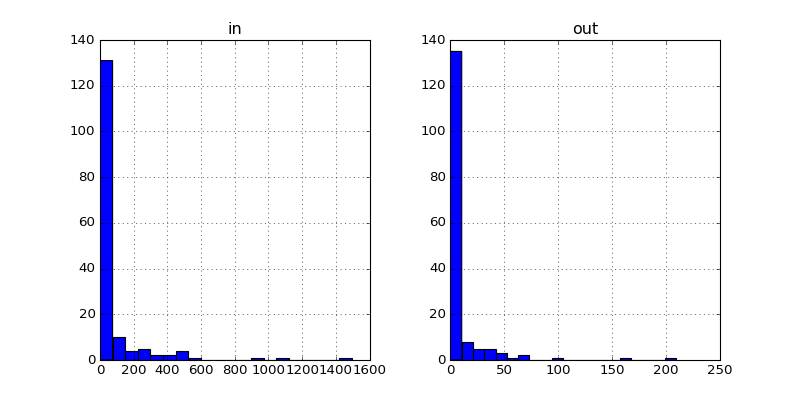

In [45]:
df_degs = pd.DataFrame({'in': credit_net.out_degree(weight= 'weight'),
                        'out': credit_net.in_degree(weight= 'weight')})

fig = df_degs.ix[df_degs['in'] > 0].hist(bins=20, figsize=(10,5));

# Interdependencies


Keeping only edges between collateral posters reveals a set of inderpendencies that are usually not modelled, but should be accounted for in risk management.

![](pics/credit_portfolio.svg.png)

# Correlation networks

Correlation networks stem from the correlation matrix

![](pics/method.png)

## Eigenvectors of correlation matrix of DAX 30

Eigenvectors of the correlation matrix indicate whether 

![](pics/correlation_eigenvector.png)

# Correlation matrix hard to interpret

![](pics/correlation_matrix.png)

# Correlation matrix with hierarchical information


![](pics/correlation_matrix_linkage.png)

# Empirical estimation of "true" correlation structure 

Estimating the "true" correlation of assets from empirical data is problematic:
- noise dominates the measurements (e.g. false positives)
- for large matrices, more variables than observations

[Mantegna 1999] showed that, when calculating the MST using a distance metric derived from the correlation
- the resulting tree is economically meaningful
- the ultrametric distance is stable


[1] Mantegna 1999, "Hierarchical structure in financial markets", R. N. Mantegna, 1999, The European Physical Journal B - Condensed Matter and Complex Systems  Volume 11, Issue 1 , pp 193-197

[2] On clustering financial time series: a need for distances between dependent random variables
Gautier Marti et al. arXiv, 2016, vol. q-fin.ST

# Filtering: Threshold based methods

Removal of all elements that are smaller than a given value.

What should this value be?

- Bonferroni Correction

- Arbitrary threshold

# Filtering: Random Matrix Theory

Reconstruct based on the eigenvectors whose eigenvalues differ from the theoretical.

Theoretical distribution of random variables 
$$\rho(\lambda) = \frac{T/N}{2\pi} \frac{\sqrt{(\lambda_{max}-\lambda)(\lambda-\lambda_{min})}}{\lambda}$$

where
$\lambda_{max,min} = 1 + \frac{N}{T} \pm 2\sqrt{N/T}$
and
$\lambda \in \left[\lambda_{min}, \lambda_{max}\right]$




# Filtering: Geometric methods

Construction based on geometric properties of the resulting graph: absence of cycles, planarity

## Minimum / Maximum Spanning Tree

Spanning Tree is a any subset of a network that contains all of its nodes and is also a tree.
A mininmum (maximum) spanning tree is the spanning tree that minimizes the sum of the weights of the edges.


  1.  sort the original network's $k$ links by increasing weights
  2.  $MST \leftarrow (\{v: v \in G\}, \{\})$
  3.  For each $i=1,2,\ldots,k:$
      add link $i$ to the $MST$ if the addition does not create cycles

**Pros**
- simple, interpretable structure
- keeps strongest correlations
- makes the 

**Cons**
- only keeps $n-1$ of the elements

TODO example

## Planar Maximally Filtered Graph


A planar graph is a graph that can be embedded into a surface without edges crossing.

- contains the MST and more edges $3(n-2)$
- preserves cliques with $3$ and $4$ elements
- parameter-free

However
- it is not (yet) clear why geometric criteria should be the best choice. They habe been shown, however, to be valid.

| Planar Graph  | Non planar graph  | 
|:-:|:-:|
| ![](pics/planar.png)  | ![](pics/non-planar.png) | 

# Correlation as a distance

   

### Gower Transformation 

Negative correlation corresponds to a low distance

$$d(i,j) = \sqrt{2(1-\rho_{i,j})}$$



### Fisher Distance

Both positive and negative correlations treated alike

$$d(i,j)=1−\rho_{i,j}^2$$

# Financial use cases

Transforming the correlation matrix to a graph opens the door to the usage of network theory.
For example, with a structural analysis, one can use

- Community structure for grouping assets
- Centrality for finding a set of diversified assets

# Community structure


It has been shown that the correlation among detected asset communities is stronger than withing sectorial information
* Covariance, correlation matrix and the multi-scale community structure of networks, Hua-Wei Shen, Xue-Qi Cheng, Bin-Xing Fang, 2010

A stable taxonomy for the FX-market is also available
* Network Communities and the Foreign Exchange Market, Daniel J. Fenn, Oxford 2010

* Evolution of worldwide stock markets, correlation structure and correlation based graphs
Dong-Ming Song,1, 2 Michele Tumminello,3, 4 Wei-Xing Zhou,1, 2, 5 and Rosario N. Mantegna4


add python example

## Use structure from correlation matrix to code diversity


Identify baskets of assets that are diversified (e.g. 20, 30 assets)

Spread of risk across financial markets: better to invest in the peripheries
F. Pozzi, T. Di Matteo and T. Aste
2013, Nature Scientific Reports 3, Article number: 1665 doi:10.1038/srep01665
http://www.nature.com/srep/2013/130416/srep01665/full/srep01665.html


![xxx](pics/paper.png)

## The similarity matrix can be seen as a graph

Different methods for sparsifying the matrix were tested: a topological argument (Planar Maximally Filtered Graph) was used.


In this paper the authors were interested in centrality, instead of community structure.
The gist of the paper is by choosing assets in the periphery, the portfolios become more diversified.

![xxx](pics/graph.png)

(picture taken from the paper)

## Equally weighted portfolios

- Risk is well distributed across the network: no correlation between centrality and signal-to-noise ratio.
- PMFG portfolios perform well

![](pics/uniform_portfolios.png)

## Markowitz portfolios (no short selling)


Market portfolio profits the most from Markowitz. 

Central baskets profit less, which means that the diversification is already very good.

Large central portfolios already very good.



![](pics/markowitz_portfolios.png)

# Resources

### Book Recommendation: Network Theory and Financial Risk

![](pics/book.png)

### Book Recommendation: Network Theory and Financial Risk

![](pics/jntf_cover.png)


## Software, etc


Python library (very early stages)
- https://github.com/mvaz/financial-correlation-networks

Financial Network Analytics
- https://maps.fna.fi

Firamis
- https://firamis.de


Twitter feeds:
- [@PeterSchwendner](https://twitter.com/PeterSchwendner)
- [@FNALab](https://twitter.com/FNALab)

## Thank you!